# Programming Assignment 3: K-Means Clustering

## Import Data

In [242]:
import numpy as np
import pandas as pd
import seaborn as sns
import random as rd
import matplotlib.pyplot as plt
from sklearn.metrics.cluster import completeness_score
from sklearn.cluster import KMeans

In [243]:
simple_data = pd.read_csv("simple.csv", header = None)
simple_data.head()

,0,1,2,3,4,5,6,7,8,9,10
0,g0,0.0,0.1,0.2,0.0,0.4,0.5,0.6,0.7,0.8,0.9
1,g1,1.0,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.0,0.1
2,g2,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
3,g3,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4
4,g4,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1,0.0


In [244]:
cancer_data = pd.read_csv("cancer.csv", header=None)
cancer_data.head()

,0,1,2,3,4,5,6,7,8,9,...,61,62,63,64,65,66,67,68,69,70
0,recur26,0.128002,-0.052396,-0.243591,1.119036,-0.638129,0.035529,-0.686474,-0.317596,-0.775309,...,0.554033,-0.041529,-0.406905,-0.297769,0.497385,-0.677355,0.050457,-0.447646,-0.155460,0.059345
1,non05,-1.142952,0.383225,-0.428263,0.153928,-0.481902,0.866565,0.367257,0.863332,-0.166169,...,-0.518305,-0.171306,-0.464664,-0.693288,0.341177,0.085424,-0.646862,-0.654781,-0.831625,-0.933931
2,recur14,-0.385717,-0.419375,-0.502132,-0.713520,-0.321211,0.043856,0.716788,-0.007181,0.265306,...,-0.730204,1.162806,0.672467,0.892113,-0.005952,-0.054792,1.050800,0.941582,-0.065305,2.478585
3,non31,0.114659,-0.292648,-0.597106,1.486697,-0.597957,0.157103,0.053708,0.309983,-0.665325,...,-0.036716,-1.136850,-0.952007,-1.188518,-0.691533,0.068598,-1.110525,-0.958339,-0.435585,-0.245441
4,recur02,0.374854,0.480910,-0.676252,0.487120,0.339409,0.365279,-0.532270,0.397709,0.296327,...,0.464136,-0.882486,-0.255288,-0.151526,-0.157822,0.051772,-0.175898,-0.504787,0.140764,-0.226392


## Initaial Heatmaps

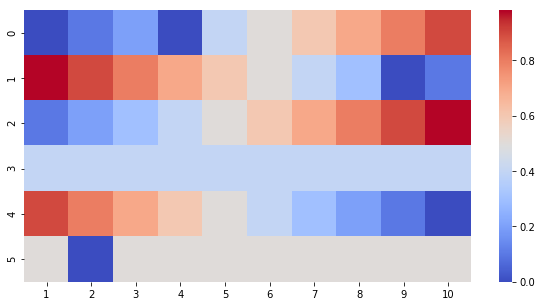

In [245]:
fig, ax = plt.subplots(figsize=(10,5))  
sns.heatmap(simple_data.iloc[:, 1:], cmap='coolwarm', robust=True, ax = ax)

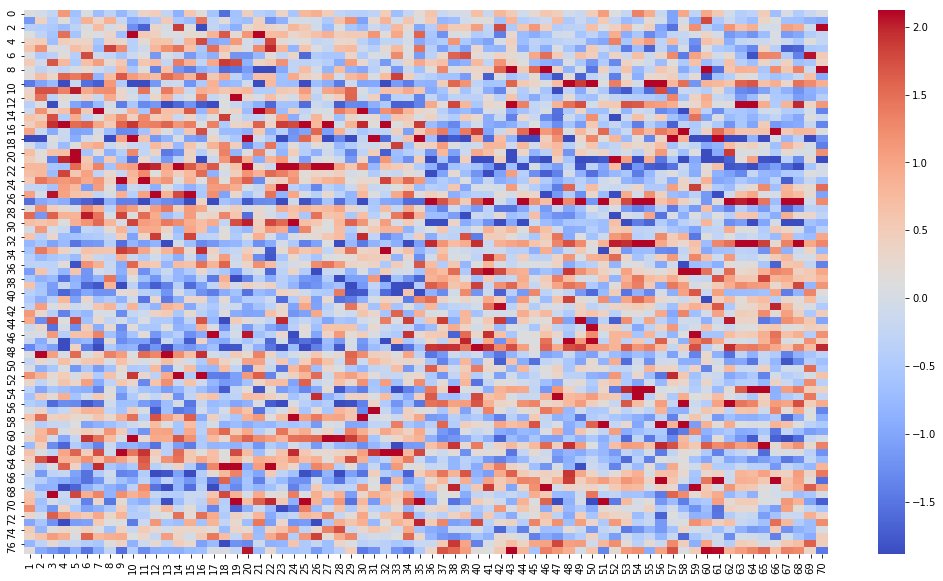

In [246]:
fig, ax = plt.subplots(figsize=(18,10))  
sns.heatmap(cancer_data.iloc[:, 1:], cmap='coolwarm', robust=True, ax = ax)

## K-Means Algorithm

In [296]:
S = simple_data.iloc[:, 1:].values
n_s = 3

C = cancer_data.iloc[:, 1:].values
n_c = 4

### Determine best number of clusters

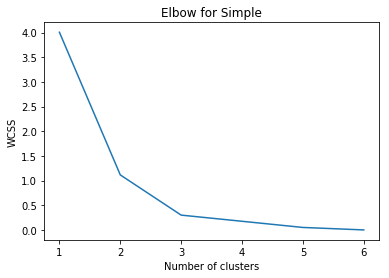

In [248]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 7):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(S)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 7), wcss)
plt.title('Elbow for Simple')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

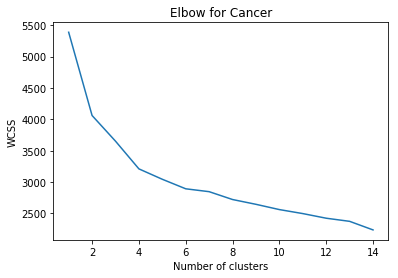

In [249]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(C)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 15), wcss)
plt.title('Elbow for Cancer')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### Personal Implementation

In [313]:
class K_Means():
    def __init__(self, n_clusters=3, m_iter=300, rs=None):
        self.n_clusters = n_clusters
        self.m_iter = m_iter
        self.rs = rs

    def fit(self, data):
        if self.rs:
            np.random.seed(self.rs)
        initial = np.random.permutation(data.shape[0])[:self.n_clusters]
        self.cluster_centers_ = data[initial]

        for _ in range(self.m_iter):
            self.labels_ = [self._closest(self.cluster_centers_, d) for d in data]
            indices = [[i for i, l in enumerate(self.labels_) if l == j]
                        for j in range(self.n_clusters)]
            data_by_cluster = [data[i] for i in indices]
            self.cluster_centers_ = [c.sum(axis=0) / len(c) for c in data_by_cluster]
        return self

    def _closest(self, clusters, x):
        return np.argmin([self._distance(x, c) for c in clusters])

    def _distance(self, a, b):
        return np.sqrt(((a - b)**2).sum())

    def predict(self, X):
        return self.labels_

In [314]:
model = K_Means(n_clusters=n_s)
model.fit(S)
s_pred = model.predict(S)
simple_data['Cluster'] = s_pred
print(s_pred)

[2, 1, 2, 0, 1, 0]


In [315]:
model = K_Means(n_clusters=n_c)
model.fit(C)
c_pred = model.predict(C)
cancer_data['Cluster'] = c_pred
print(y_pred)

[0, 0, 3, 1, 0, 1, 0, 0, 2, 1, 2, 1, 0, 2, 1, 1, 1, 2, 3, 3, 3, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 0, 0, 2, 1, 0, 0, 2, 2, 2, 0, 3, 0, 0, 3, 0, 3, 2, 2, 1, 1, 3, 0, 0, 2, 0, 2, 0, 1, 3, 1, 1, 2, 1, 1, 0, 2, 2, 2, 1, 0, 0, 1, 0, 1, 1, 0, 2]


### Skit-learn Implementation

In [299]:
kmeans = KMeans(n_clusters=n_s)
s_true = kmeans.fit_predict(S)
print(s_true)

[1 0 1 2 0 2]


In [300]:
kmeans = KMeans(n_clusters=n_c)
c_true = kmeans.fit_predict(C)
print(c_true)

[0 0 0 1 1 1 0 1 0 1 2 1 1 2 1 1 1 0 3 0 0 1 1 1 1 0 1 2 1 1 1 0 0 2 1 0 1
 0 2 2 0 0 0 0 0 0 0 2 2 1 1 0 1 1 2 0 2 0 1 0 1 1 2 1 1 1 2 2 0 1 0 0 1 0
 1 1 0 2]


## Accuracy Tests

In [301]:
print("Simple data prediction accuracy: " + str(completeness_score(s_pred, s_true)))
print("Cancer data prediction accuracy: " + str(completeness_score(c_pred, c_true)))

Simple data prediction accuracy: 1.0
Cancer data prediction accuracy: 0.8385849756481171


## Visulizations

In [267]:
sd = simple_data.sort_values(['Cluster'],ascending=False)
sd.head()

,0,1,2,3,4,5,6,7,8,9,10,Cluster
1,g1,1.0,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.0,0.1,2
4,g4,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1,0.0,2
3,g3,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,1
5,g5,0.5,0.0,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,1
0,g0,0.0,0.1,0.2,0.0,0.4,0.5,0.6,0.7,0.8,0.9,0


In [268]:
cd = cancer_data.sort_values(['Cluster'],ascending=False)
cd.head()

,0,1,2,3,4,5,6,7,8,9,...,62,63,64,65,66,67,68,69,70,Cluster
16,non06,0.458250,0.803006,1.935539,2.250741,1.517811,1.627655,0.963515,0.532672,1.576649,...,-1.193952,-0.533253,-0.995744,0.510403,-1.142875,-1.000998,-0.936912,-0.206977,-1.339405,3
61,non14,0.348167,0.821487,-0.090577,-0.983521,-0.214083,1.924097,1.477531,0.711499,0.048159,...,-0.737136,-1.154163,-1.743574,-0.201213,-1.692525,-1.964833,-1.586885,-0.213417,-0.027736,3
30,non42,0.708438,0.618197,0.711427,0.090737,0.875046,1.168003,1.554633,0.819469,0.000217,...,-1.251054,-1.078355,-2.105856,-0.999611,-0.004314,-3.231690,-2.140433,-0.625556,-0.786981,3
28,non30,0.184711,1.233348,0.489821,0.251588,-0.017683,1.262931,0.855572,-0.337841,1.283359,...,-1.334112,-0.385246,-0.759761,-1.125445,-0.368878,-1.650856,-1.144046,-0.329331,-0.405998,3
49,non07,0.084636,2.257718,1.043837,0.027545,1.535665,0.093818,0.434080,1.352574,1.071852,...,-1.557329,-0.316657,-0.842854,-0.227247,-0.464225,-1.377040,-0.826202,-0.603017,-0.332523,3


### Updated Heatmaps

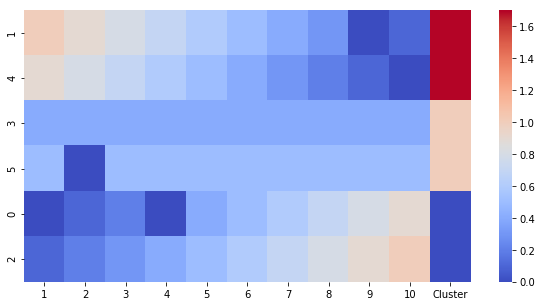

In [273]:
fig, ax = plt.subplots(figsize=(10,5))  
sns.heatmap(sd.iloc[:, 1:], cmap='coolwarm', robust=True, ax = ax)

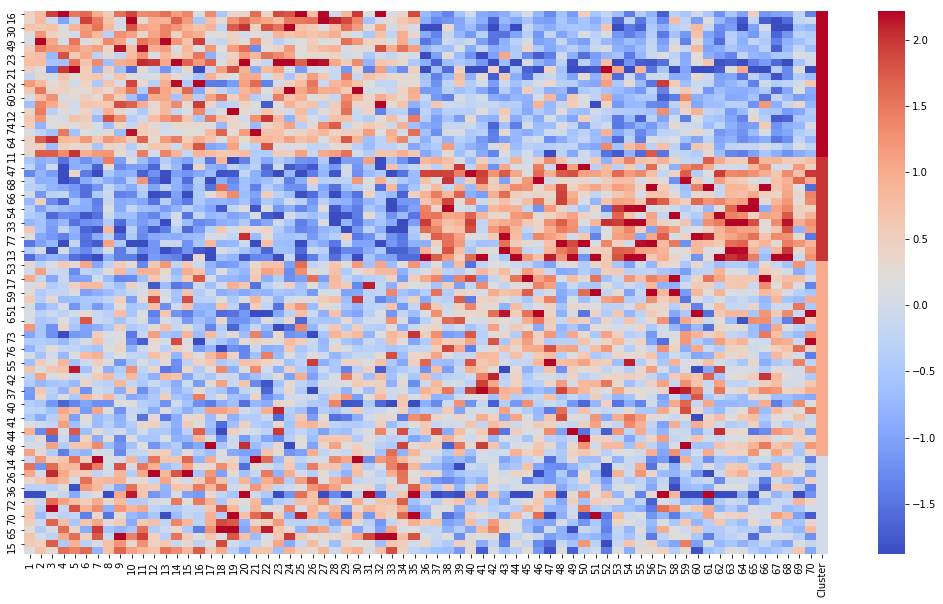

In [272]:
fig, ax = plt.subplots(figsize=(18,10))  
sns.heatmap(cd.iloc[:, 1:], cmap='coolwarm', robust=True, ax = ax)